In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import auc, classification_report, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv("titanic.csv")

In [3]:
df.dropna(inplace=True)
le = LabelEncoder()
df.Sex = le.fit_transform(df.Sex)
df.Name = le.fit_transform(df.Name)

In [4]:
x = df.drop('Survived',axis=1)
y = df['Survived']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)

# Decision Tree (Cart)

In [5]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train,y_train)
y_score_dctr = dtree.predict_proba(x_test)
predictions_dctr = dtree.predict(x_test)
print(classification_report(y_test,predictions_dctr))

              precision    recall  f1-score   support

           0       0.75      0.85      0.80       152
           1       0.74      0.61      0.67       110

    accuracy                           0.75       262
   macro avg       0.75      0.73      0.73       262
weighted avg       0.75      0.75      0.74       262



# Random Forest

In [6]:
clf = RandomForestClassifier(n_estimators=20, max_depth=4)
clf.fit(x_train, y_train)
y_score_rndfst = clf.predict_proba(x_test)
predictions_rndfst = clf.predict(x_test)
print(classification_report(y_test,predictions_rndfst))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       152
           1       0.87      0.75      0.81       110

    accuracy                           0.85       262
   macro avg       0.86      0.84      0.84       262
weighted avg       0.85      0.85      0.85       262



# Gaussian NB

In [7]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_score_gaus = gnb.predict_proba(x_test)
predictions_gaus = gnb.predict(x_test)
print(classification_report(y_test,predictions_gaus))

              precision    recall  f1-score   support

           0       0.81      0.82      0.82       152
           1       0.75      0.74      0.74       110

    accuracy                           0.79       262
   macro avg       0.78      0.78      0.78       262
weighted avg       0.79      0.79      0.79       262



# ROC Curve

<Figure size 432x288 with 0 Axes>

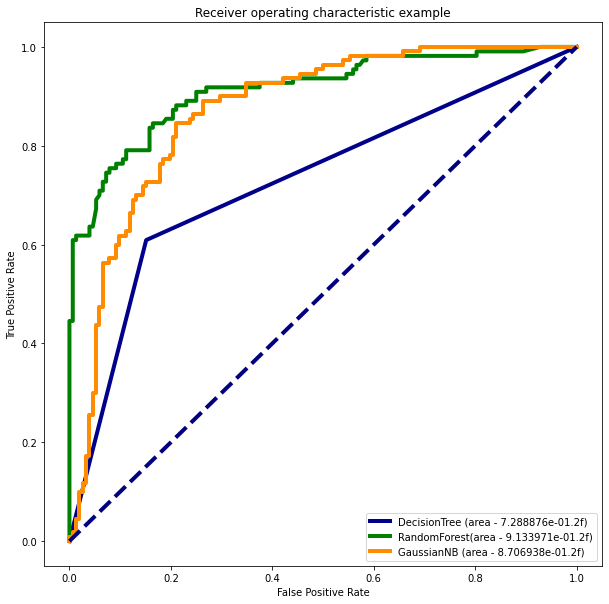

In [8]:
dfpr,dtpr,gthreshold = roc_curve(y_test, y_score_dctr[:,1])
cfpr,ctpr,gthreshold = roc_curve(y_test, y_score_rndfst[:,1])
gfpr,gtpr,gthreshold = roc_curve(y_test, y_score_gaus[:,1])

roc_auc_dctr = auc(dfpr,dtpr)
roc_auc_rndfst = auc(cfpr,ctpr)
roc_auc_gaus = auc(gfpr,gtpr)
plt.figure()
lw = 4
plt.figure(figsize=(10,10))

plt.plot(dfpr, dtpr, color='darkblue', lw=lw, label='DecisionTree (area - %e.2f)' % roc_auc_dctr)
plt.plot(cfpr, ctpr, color='green', lw=lw, label='RandomForest(area - %e.2f)' % roc_auc_rndfst)
plt.plot(gfpr, gtpr, color='darkorange', lw=lw, label='GaussianNB (area - %e.2f)' % roc_auc_gaus)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()